In [ ]:
!

Import Relevant Packages

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import os 
import cv2
import random
from tensorflow.keras.utils import to_categorical
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet

Unzip & prepare data to train

*Source for synthetically created data: https://paperswithcode.com/paper/maskedface-net-a-dataset-of-correctly*

*Source for images of people with no masks: https://github.com/NVlabs/ffhq-dataset*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!mkdir dataset
%cd '/content/dataset'
!mkdir with_mask
!mkdir without_mask
!mkdir incorrect_mask

/content/dataset


In [ ]:
import shutil

def move_images_to_datasets(label):
    for folder in os.listdir():
      if folder == 'with_mask' or folder == 'without_mask' or folder == 'incorrect_mask':
          continue
      for file in os.listdir(os.path.join(os.getcwd(), folder)):
          shutil.move(os.path.join(os.getcwd(), folder, file), os.path.join(os.getcwd(), label))
      os.rmdir(os.path.join(os.getcwd(), folder))

In [ ]:
!7z x '/content/gdrive/MyDrive/CMFD.zip' 


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/MyDrive/                                  1 file, 10272450486 bytes (9797 MiB)

Extracting archive: /content/gdrive/MyDrive/CMFD.zip
 12% 4096 Open              --
Path = /content/gdrive/MyDrive/CMFD.zip
Type = zip
Physical Size = 10272450486
64-bit = +

  0%      0% 157 - 00000/00165_Mask.jpg                                 0% 253 - 00000/00262_Mask.jpg                                 0% 334 - 00000/00345_Mask.jpg                                 1%

In [ ]:
print(len(os.listdir('/content/dataset/with_mask')))
move_images_to_datasets('with_mask')
print(len(os.listdir('/content/dataset/with_mask')))

0
33686


In [ ]:
!7z x '/content/gdrive/MyDrive/IMFD.zip'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/MyDrive/                                  1 file, 10263350561 bytes (9788 MiB)

Extracting archive: /content/gdrive/MyDrive/IMFD.zip
 12% 4096 Open              --
Path = /content/gdrive/MyDrive/IMFD.zip
Type = zip
Physical Size = 10263350561
64-bit = +

  0%      0% 150 - 00000/00164_Mask_Chin.jpg                                      0% 268 - 00000/00294_Mask_Mouth_Chin.jpg                                            0% 333 - 00000/00364_Mask_Mouth_Chin.jpg

In [ ]:
print(len(os.listdir('/content/dataset/incorrect_mask')))
move_images_to_datasets('incorrect_mask')
print(len(os.listdir('/content/dataset/incorrect_mask')))

0
33553


In [ ]:
!7z x '/content/gdrive/MyDrive/CMFD1.zip' 


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/MyDrive/                                  1 file, 10183052608 bytes (9712 MiB)

Extracting archive: /content/gdrive/MyDrive/CMFD1.zip
 12% 4096 Open              --
Path = /content/gdrive/MyDrive/CMFD1.zip
Type = zip
Physical Size = 10183052608
64-bit = +

  0%      0% 128 - 35000/35133_Mask.jpg                                 0% 215 - 35000/35222_Mask.jpg                                 0% 317 - 35000/35330_Mask.jpg                                 

In [ ]:
print(len(os.listdir('/content/dataset/with_mask')))
move_images_to_datasets('with_mask')
print(len(os.listdir('/content/dataset/with_mask')))

33686
67048


In [ ]:
!7z x '/content/gdrive/MyDrive/IMFD1.zip'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/MyDrive/                                  1 file, 10158263021 bytes (9688 MiB)

Extracting archive: /content/gdrive/MyDrive/IMFD1.zip
 12% 4096 Open              --
Path = /content/gdrive/MyDrive/IMFD1.zip
Type = zip
Physical Size = 10158263021
64-bit = +

  0%      0% 136 - 35000/35138_Mask_Mouth_Chin.jpg                                            0% 234 - 35000/35239_Mask_Chin.jpg                                      0% 254          0% 305 - 35000/35313_Mask_Mo

In [ ]:
print(len(os.listdir('/content/dataset/incorrect_mask')))
move_images_to_datasets('incorrect_mask')
print(len(os.listdir('/content/dataset/incorrect_mask')))

33553
66734


In [ ]:
!7z x '/content/gdrive/MyDrive/thumbnails128x128.zip'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/MyDrive/                                  1 file, 2114632904 bytes (2017 MiB)

Extracting archive: /content/gdrive/MyDrive/thumbnails128x128.zip
  5% 4096 Open              --
Path = /content/gdrive/MyDrive/thumbnails128x128.zip
Type = zip
Physical Size = 2114632904
64-bit = +

  0%      1% 920 - thumbnails128x128/00919.png                                        2% 1421 - thumbnails128x128/01420.png                                         2% 1799 - thumbnails128x128/01798.png

In [ ]:
!for i in /content/dataset/thumbnails128x128/*; do mv "$i" /content/dataset/without_mask; done

In [ ]:
print("with_mask: ", len(os.listdir('/content/dataset/with_mask')))
print("incorrect_mask: ", len(os.listdir('/content/dataset/incorrect_mask')))
print("without_mask: ", len(os.listdir('/content/dataset/without_mask')))

with_mask:  33686
incorrect_mask:  33553
without_mask:  70001


In [ ]:
!rm -rf /content/dataset/thumbnails128x128

In [ ]:
!mkdir test
!mkdir test/with_mask
!mkdir test/without_mask
!mkdir test/incorrect_mask

count = 0
for file in os.listdir('incorrect_mask'):
  count += 1
  if count <= 3000:
    shutil.move(os.path.join(os.getcwd(), 'incorrect_mask', file), os.path.join(os.getcwd(), 'test', 'incorrect_mask'))
  else:
    break

count = 0
for file in os.listdir('with_mask'):
  count += 1
  if count <= 3000:
    shutil.move(os.path.join(os.getcwd(), 'with_mask', file), os.path.join(os.getcwd(), 'test', 'with_mask'))
  else:
    break

count = 0
for file in os.listdir('without_mask'):
  count += 1
  if count <= 3000:
    shutil.move(os.path.join(os.getcwd(), 'without_mask', file), os.path.join(os.getcwd(), 'test', 'without_mask'))
  else:
    break

print("with_mask: ", len(os.listdir('/content/dataset/test/with_mask')))
print("incorrect_mask: ", len(os.listdir('/content/dataset/test/incorrect_mask')))
print("without_mask: ", len(os.listdir('/content/dataset/test/without_mask')))

with_mask:  3000
incorrect_mask:  3000
without_mask:  3000


In [ ]:
!mkdir train
!mkdir validation
!mkdir train/with_mask
!mkdir train/without_mask
!mkdir train/incorrect_mask
!mkdir validation/with_mask
!mkdir validation/without_mask
!mkdir validation/incorrect_mask

In [ ]:
def prepare_train_val():
    labels = ['with_mask', 'incorrect_mask', 'without_mask']
    for label in labels:  
      count = 0
      for file in os.listdir(label):
          count += 1
          if count <= 50000:
            shutil.move(os.path.join(os.getcwd(), label, file), os.path.join(os.getcwd(), 'train', label))
          else:
            shutil.move(os.path.join(os.getcwd(), label, file), os.path.join(os.getcwd(), 'validation', label))

In [ ]:
prepare_train_val()

In [ ]:
# Train data amount: 150.000 images
# Validation: ~50.000 
print("Train      | MASK          : ", len(os.listdir('/content/dataset/train/with_mask')))
print("Validation | MASK          : ", len(os.listdir('/content/dataset/validation/with_mask')))
print("Train      | NO MASK       : ", len(os.listdir('/content/dataset/train/without_mask')))
print("Validation | NO MASK       : ", len(os.listdir('/content/dataset/validation/without_mask')))
print("Train      | INCORRECT MASK: ", len(os.listdir('/content/dataset/train/incorrect_mask')))
print("Validation | INCORRECT MASK: ", len(os.listdir('/content/dataset/validation/incorrect_mask')))

Train      | MASK          :  50000
Validation | MASK          :  17048
Train      | NO MASK       :  50000
Validation | NO MASK       :  20001
Train      | INCORRECT MASK:  50000
Validation | INCORRECT MASK:  16734


Create Generators

In [ ]:
def to_grayscale(image):
    image = tf.image.rgb_to_grayscale(image)
    return image


train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=60,
                                  horizontal_flip=True,
                                  brightness_range=[0.5, 1.5],
                                  shear_range=0.25,
                                  zoom_range=0.3)

val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/dataset/train'
val_dir = '/content/dataset/validation'

# flow_from_directory
# train_dir is a directory that has n folders in it to train where n is the number of classes.
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    color_mode='grayscale',
                                                    batch_size=32, 
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed=42)

validation_generator = val_datagen.flow_from_directory(val_dir,
                                                        target_size=(224, 224),
                                                        color_mode='grayscale',
                                                        batch_size=32, 
                                                        class_mode='categorical',
                                                        shuffle=False)

Found 149999 images belonging to 3 classes.
Found 53783 images belonging to 3 classes.


**Transfer Learning**

Functions for Creating Base & Final Models

In [ ]:
def create_base_model(pre_trained_model, input_layer, output_layer):
  """
  Takes the pre_trained_model and arranges the layer that will be used for the training session.

  Params:
    --pre_trained_model: The pre-trained model that will be used as our final model's backbone.
    --input_layer: Index of the input layer. 
    --output_layer: Index of the output layer.
  
  Returns:
    --base_model: Newly created base model for training session. We are going to customize this base model in the create_final_model() function.

  """
  base_input = pre_trained_model.layers[input_layer].input
  base_output = pre_trained_model.layers[output_layer].output

  print(f'Base Input: {base_input}')
  print(f'Base Output: {base_output}')

  base_model = keras.Model(inputs=base_input, outputs=base_output)
  base_model.trainable = False
  return base_model


def create_final_model(base_model, dropout_rate=0):
  """
  Takes the pre_trained_model and arranges the layer that will be used for the training session.

  Params:
    --base_model: Backbone model.
    --dropout_rate: Dropout_rate. 
  
  Returns:
    --model: Final model which is ready for the train.

  """
  input = tf.keras.layers.Input(shape=(224, 224, 1))
  concat = layers.Concatenate()([input, input, input])
  # inputs = keras.Input(shape=(224, 224, 1))
  x = base_model(concat, training=False)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dropout(dropout_rate)(x)
  outputs = layers.Dense(3, activation='softmax')(x)
  model = keras.Model(input, outputs)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

MobileNet

In [ ]:
mobilenet_model = MobileNet(weights="imagenet")
# output_layer = -19: conv_pw_11_relu
# output_layer = -12: conv_pw_12_relu
# output_layer = -6: conv_pw_13_relu
base_model = create_base_model(mobilenet_model, input_layer=0, output_layer=-19)
model = create_final_model(base_model, dropout_rate=0.3)

import math 
from keras.callbacks import ModelCheckpoint

# SPE -> It is used to define how many batches of samples to use in one epoch.
spe = math.ceil(train_generator.samples / train_generator.batch_size)
val_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)
epochs = 15

# Callback for saving best weights
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/model_mobilenet_19_d3.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model.fit(train_generator, steps_per_epoch=spe, epochs=epochs, validation_data=validation_generator, validation_steps=val_steps, callbacks=[checkpoint])

model.load_weights("/content/gdrive/MyDrive/model_mobilenet_19_d3.h5")

Inception V3

In [ ]:
inception_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
inception_model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

In [ ]:
inception_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
# output_layer = -32: mixed9 
# output_layer = -4: mixed9_1 
# output_layer = -1: mixed10
"""
output_layer = None
for idx, layer in enumerate(inception_model.layers):
    if layer.name == 'mixed6':
        output_layer = idx
        break
"""
base_model = create_base_model(inception_model, input_layer=0, output_layer=-1)
model = create_final_model(base_model, dropout_rate=0.3)
model.summary()

Base Input: KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
Base Output: KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 2048), dtype=tf.float32, name=None), name='mixed10/concat:0', description="created by layer 'mixed10'")
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 concatenate_5 (Concatenate)    (None, 224, 224, 3)  0           ['input_4[0][0]',                
                                                       

Train

In [ ]:
import math 
from keras.callbacks import ModelCheckpoint

# SPE -> It is used to define how many batches of samples to use in one epoch.
spe = math.ceil(train_generator.samples / train_generator.batch_size)
val_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)
epochs = 8

In [ ]:
train_generator.reset()
validation_generator.reset()

In [ ]:
# Callback for saving best weights
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/model_last_output_inception.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model.fit(train_generator, steps_per_epoch=spe, epochs=epochs, validation_data=validation_generator, validation_steps=val_steps, callbacks=[checkpoint])

model.load_weights("/content/gdrive/MyDrive/model_last_output_inception.h5") 

Epoch 1/8
4688/4688 [==============================] - ETA: 0s - loss: 0.2894 - accuracy: 0.8894
Epoch 1: val_accuracy improved from -inf to 0.95523, saving model to /content/gdrive/MyDrive/model_last_output_inception.h5
4688/4688 [==============================] - 3494s 745ms/step - loss: 0.2894 - accuracy: 0.8894 - val_loss: 0.1317 - val_accuracy: 0.9552
Epoch 2/8
4688/4688 [==============================] - ETA: 0s - loss: 0.2626 - accuracy: 0.9028
Epoch 2: val_accuracy did not improve from 0.95523
4688/4688 [==============================] - 3483s 743ms/step - loss: 0.2626 - accuracy: 0.9028 - val_loss: 0.1399 - val_accuracy: 0.9461
Epoch 3/8
4688/4688 [==============================] - ETA: 0s - loss: 0.2619 - accuracy: 0.9031
Epoch 3: val_accuracy did not improve from 0.95523
4688/4688 [==============================] - 3478s 742ms/step - loss: 0.2619 - accuracy: 0.9031 - val_loss: 0.1367 - val_accuracy: 0.9519
Epoch 4/8
4688/4688 [==============================] - ETA: 0s - loss

**Plotting Loss & Accuracy for Transfer Learning**

In [ ]:
def plot_for_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

def plot_for_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

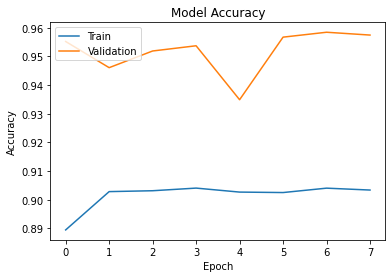

In [ ]:
plot_for_accuracy(history)

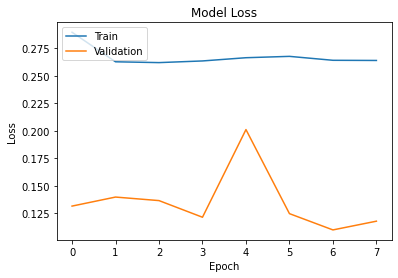

In [ ]:
plot_for_loss(history)

**Fine-Tuning**

In [ ]:
train_generator.reset()
validation_generator.reset()

In [ ]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train end-to-end. Be careful to stop before you overfit!
epochs = 10

checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/model_last_output_inception_fine_tuned.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(train_generator, steps_per_epoch=spe, epochs=epochs, validation_data=validation_generator, validation_steps=val_steps, callbacks=[checkpoint])

Epoch 1/10
4688/4688 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.9908
Epoch 1: val_loss improved from inf to 0.00447, saving model to /content/gdrive/MyDrive/model_last_output_inception_fine_tuned.h5
4688/4688 [==============================] - 3310s 703ms/step - loss: 0.0264 - accuracy: 0.9908 - val_loss: 0.0045 - val_accuracy: 0.9984
Epoch 2/10
4688/4688 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9982
Epoch 2: val_loss improved from 0.00447 to 0.00292, saving model to /content/gdrive/MyDrive/model_last_output_inception_fine_tuned.h5
4688/4688 [==============================] - 3334s 711ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 3/10
4688/4688 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9986
Epoch 3: val_loss improved from 0.00292 to 0.00195, saving model to /content/gdrive/MyDrive/model_last_output_inception_fine_tuned.h5
4688/4688 [=====================

Plotting Loss & Accuracy for Fine-Tuning

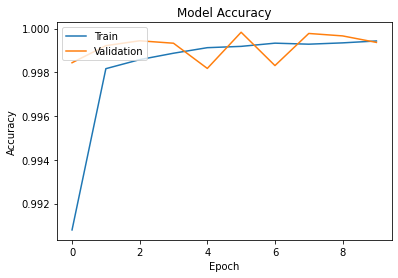

In [ ]:
plot_for_accuracy(history)

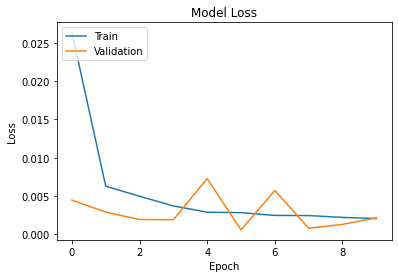

In [ ]:
plot_for_loss(history)

**Testing**

In prediction, the probability order will be:

['Incorrect Mask', 'With Mask', 'Without Mask']

In [ ]:
def prepare_test_data():
  X_test = []
  y_test = []
  LABELS = ['incorrect_mask', 'with_mask', 'without_mask']
  for label in os.listdir('/content/dataset/test'):
    for file_name in os.listdir(os.path.join('/content/dataset/test', label)):
      img_path = os.path.join('/content/dataset/test', label, file_name)
      img_original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      try:
        img_scaled = img_original / 255
      except:
        print(img_original)
      img_resized = cv2.resize(img_scaled, (224, 224))
      img_reshaped = img_resized.reshape(1, 224, 224, 1)
      X_test.append(img_reshaped)
      y_test.append(LABELS.index(label))
      del img_original
      del img_resized

  # Shuffle X_test & y_test in the same order
  zipped = list(zip(X_test, y_test))
  random.shuffle(zipped)                              
  X_test, y_test = zip(*zipped)

  X_test = np.array(X_test)
  y_test = to_categorical(y_test, 3)
  y_test = np.array(y_test)
  
  return X_test, y_test
  

def test_model(model, X_test, y_test):
  result = model.evaluate(X_test, y_test)
  for metric, score in zip(model.metrics_names, result):
    print(f'{metric}: {score}')

In [ ]:
import gc
gc.collect()

88

In [ ]:
del X_test, y_test
X_test, y_test = prepare_test_data()
print(len(X_test))
print(len(y_test))

None
9000
9000


In [ ]:
from keras.models import load_model

model = load_model('/content/gdrive/MyDrive/model_last_output_inception_fine_tuned.h5')

In [ ]:
X_test[0].shape

(1, 224, 224, 1)

**Test Image #1**

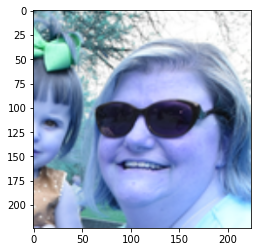

In [ ]:
# No Mask
plt.imshow(X_test[0].reshape(224, 224, 3))

In [ ]:
# Correct prediction
y_test[0]

array([0., 0., 1.], dtype=float32)

**Test Image #2**

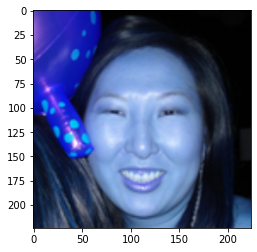

In [ ]:
# No Mask
plt.imshow(X_test[2].reshape(224, 224, 3))

In [ ]:
# Correct prediction
y_test[2]

array([0., 0., 1.], dtype=float32)

**Test Image #3**

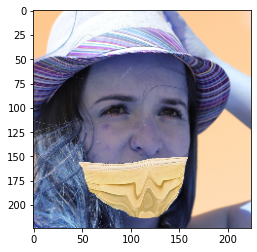

In [ ]:
# Incorrectly Worn Mask
plt.imshow(X_test[4].reshape(224, 224, 3))

In [ ]:
# Correct prediction
y_test[4]

array([1., 0., 0.], dtype=float32)

**Test Image #4**

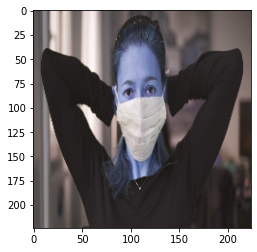

In [ ]:
# With Mask
plt.imshow(X_test[5].reshape(224, 224, 3))

In [ ]:
# Correct prediction
y_test[5]

array([0., 1., 0.], dtype=float32)

Delete Model & Reset Generators

In [ ]:
del model
del checkpoint
train_generator.reset()
validation_generator.reset()